In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats
import math
import warnings
warnings.filterwarnings("ignore")

In [81]:
df1 = pd.read_csv("dataset1.csv")
df2 = pd.read_csv("dataset2.csv")

In [82]:
df2.head()

,time,month,hours_after_sunset,bat_landing_number,food_availability,rat_minutes,rat_arrival_number
0,26/12/2017 16:13,0,-0.5,20,4.000000,0.0,0
1,26/12/2017 16:43,0,0.0,28,4.000000,0.0,0
2,26/12/2017 17:13,0,0.5,25,4.000000,0.0,0
3,26/12/2017 17:43,0,1.0,71,4.000000,0.0,0
4,26/12/2017 18:13,0,1.5,44,3.753857,0.0,0


**hours after sunset has negetive values**

In [83]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2123 entries, 0 to 2122
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   time                2123 non-null   object 
 1   month               2123 non-null   int64  
 2   hours_after_sunset  2123 non-null   float64
 3   bat_landing_number  2123 non-null   int64  
 4   food_availability   2123 non-null   float64
 5   rat_minutes         2123 non-null   float64
 6   rat_arrival_number  2123 non-null   int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 116.2+ KB


In [84]:
df2.describe()

,month,hours_after_sunset,bat_landing_number,food_availability,rat_minutes,rat_arrival_number
count,2123.000000,2123.000000,2123.000000,2123.000000,2123.000000,2123.000000
mean,3.083844,5.265426,32.083373,2.445874,1.994442,0.444654
std,1.642261,4.076188,25.614431,1.218353,6.793397,1.019195
min,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,11.000000,1.962206,0.000000,0.000000
50%,4.000000,5.000000,27.000000,2.951877,0.000000,0.000000
75%,4.000000,8.500000,48.000000,3.105873,0.158333,1.000000
max,6.000000,13.500000,178.000000,4.000000,120.000000,17.000000


**hours_after_sunset showing negetive values**

In [85]:
df2["hours_after_sunset"] = df2['hours_after_sunset'].apply(lambda x: x if x>=0 else (-1*x))

In [86]:
df2.describe()

,month,hours_after_sunset,bat_landing_number,food_availability,rat_minutes,rat_arrival_number
count,2123.000000,2123.000000,2123.000000,2123.000000,2123.000000,2123.000000
mean,3.083844,5.488695,32.083373,2.445874,1.994442,0.444654
std,1.642261,3.770028,25.614431,1.218353,6.793397,1.019195
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,11.000000,1.962206,0.000000,0.000000
50%,4.000000,5.000000,27.000000,2.951877,0.000000,0.000000
75%,4.000000,8.500000,48.000000,3.105873,0.158333,1.000000
max,6.000000,13.500000,178.000000,4.000000,120.000000,17.000000


In [87]:
df2['hours_after_sunset'].value_counts()

hours_after_sunset
0.5     147
1.0     134
1.5     125
2.0     116
5.0      80
5.5      80
6.5      80
6.0      80
4.5      79
3.0      79
3.5      79
2.5      79
7.0      78
4.0      78
7.5      77
8.0      75
9.0      75
8.5      75
9.5      75
0.0      73
10.0     71
10.5     66
11.0     56
11.5     48
12.0     40
13.0     31
12.5     30
13.5     17
Name: count, dtype: int64

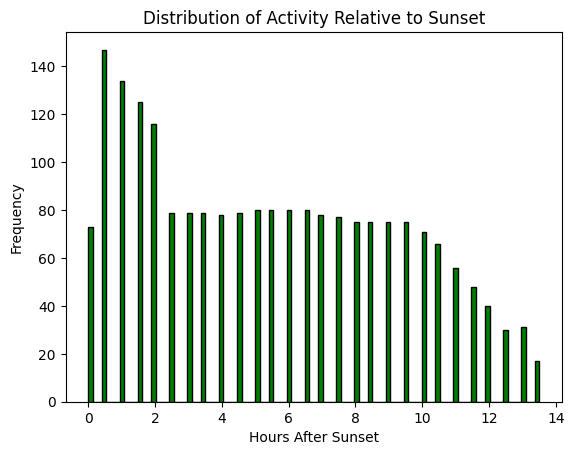

In [88]:
plt.hist(df2["hours_after_sunset"], bins=100, color='green', edgecolor='black')
plt.xlabel("Hours After Sunset")
plt.ylabel("Frequency")
plt.title("Distribution of Activity Relative to Sunset")
plt.show()


In [89]:
df2['bat_landing_number'].value_counts()

bat_landing_number
2      73
1      72
3      68
5      46
14     45
       ..
116     1
151     1
158     1
110     1
97      1
Name: count, Length: 119, dtype: int64

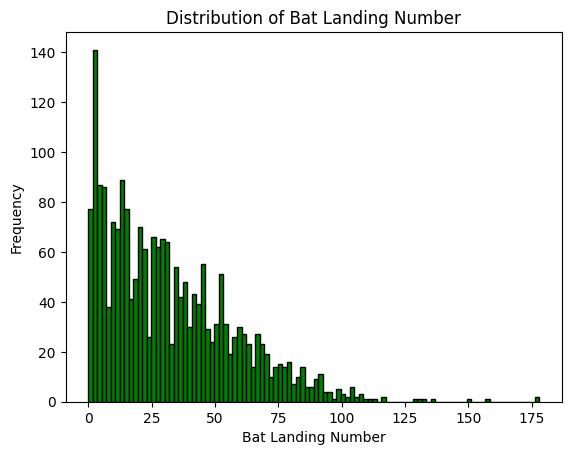

In [90]:
plt.hist(df2["bat_landing_number"], bins=100, color='green', edgecolor='black')
plt.xlabel("Bat Landing Number")
plt.ylabel("Frequency")
plt.title("Distribution of Bat Landing Number")
plt.show()

In [91]:
sample = df2['bat_landing_number'].values
x_bar = stats.mean(sample)
print("Mean:", x_bar)

median = stats.median(sample)
print("Median: %.2f" % median)

mode = stats.mode(sample)
print("Mode value: %d" % mode)

the_range = np.max(sample) - np.min(sample)
print("Range: %d" % the_range)

sample_array = np.array(sample)
s_square = sample_array.var(ddof=1)
sigma_square = sample_array.var()
print("Sample variance: %.2f. Population variance: %.2f." % (s_square, sigma_square))

s = sample_array.std(ddof=1)
sigma = sample_array.std()
print("Sample std. dev.: %.2f. Population std. dev.: %.2f." % (s, sigma))

pct25 = np.percentile(sample, 25)
pct75 = np.percentile(sample, 75)
iqr = pct75 - pct25
print("IQR: %.2f. 25th percentile: %.2f. 75th percentile: %.2f" % (iqr, pct25, pct75))


Mean: 32
Median: 27.00
Mode value: 2
Range: 178
Sample variance: 656.10. Population variance: 655.79.
Sample std. dev.: 25.61. Population std. dev.: 25.61.
IQR: 37.00. 25th percentile: 11.00. 75th percentile: 48.00


In [92]:
df2['food_availability'].value_counts()

food_availability
3.000000    453
4.000000    353
2.000000    312
0.000000    185
1.000000    143
           ... 
1.888948      1
1.426230      1
1.034902      1
3.989705      1
3.438596      1
Name: count, Length: 600, dtype: int64

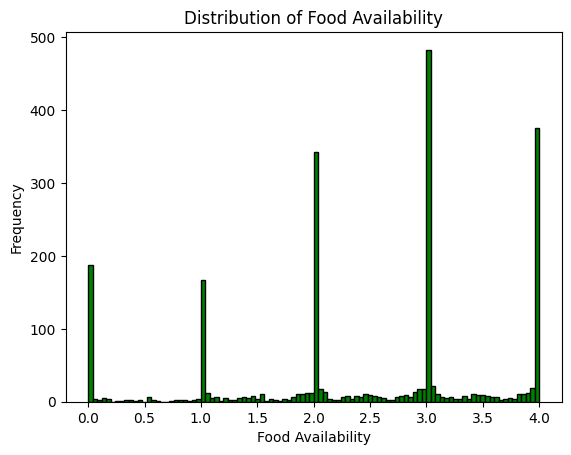

In [93]:
plt.hist(df2["food_availability"], bins=100, color='green', edgecolor='black')
plt.xlabel("Food Availability")
plt.ylabel("Frequency")
plt.title("Distribution of Food Availability")
plt.show()

In [94]:

sample = df2['food_availability'].values
x_bar = stats.mean(sample)
print("Mean:", x_bar)

median = stats.median(sample)
print("Median: %.2f" % median)

mode = stats.mode(sample)
print("Mode value: %.2f" % mode)

the_range = np.max(sample) - np.min(sample)
print("Range: %.2f" % the_range)

sample_array = np.array(sample)
s_square = sample_array.var(ddof=1)
sigma_square = sample_array.var()
print("Sample variance: %.2f. Population variance: %.2f." % (s_square, sigma_square))

s = sample_array.std(ddof=1)
sigma = sample_array.std()
print("Sample std. dev.: %.2f. Population std. dev.: %.2f." % (s, sigma))

pct25 = np.percentile(sample, 25)
pct75 = np.percentile(sample, 75)
iqr = pct75 - pct25
print("IQR: %.2f. 25th percentile: %.2f. 75th percentile: %.2f" % (iqr, pct25, pct75))


Mean: 2.4458744278351388
Median: 2.95
Mode value: 3.00
Range: 4.00
Sample variance: 1.48. Population variance: 1.48.
Sample std. dev.: 1.22. Population std. dev.: 1.22.
IQR: 1.14. 25th percentile: 1.96. 75th percentile: 3.11


In [95]:
df2['rat_minutes'].value_counts()

rat_minutes
0.000000     1578
2.766667        4
1.550000        4
1.050000        4
5.550000        4
             ... 
4.383333        1
1.733333        1
23.433333       1
2.516667        1
5.650000        1
Name: count, Length: 401, dtype: int64

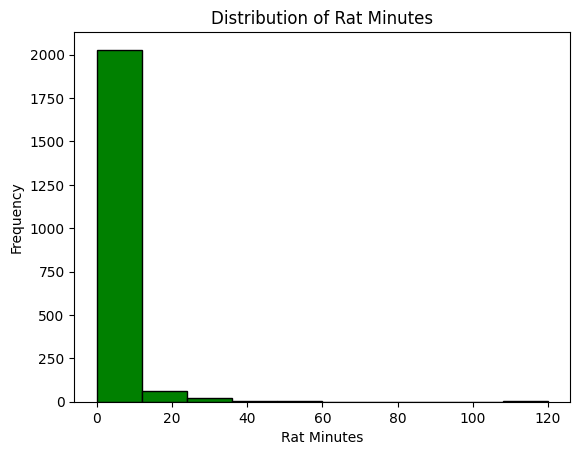

In [96]:
plt.hist(df2["rat_minutes"], bins=10, color='green', edgecolor='black')
plt.xlabel("Rat Minutes")
plt.ylabel("Frequency")
plt.title("Distribution of Rat Minutes")
plt.show()


In [97]:
sample = df2['rat_minutes'].values
x_bar = stats.mean(sample)
print("Mean:", x_bar)

median = stats.median(sample)
print("Median: %.2f" % median)

mode = stats.mode(sample)
print("Mode value: %.2f" % mode)

the_range = np.max(sample) - np.min(sample)
print("Range: %.2f" % the_range)

sample_array = np.array(sample)
s_square = sample_array.var(ddof=1)
sigma_square = sample_array.var()
print("Sample variance: %.2f. Population variance: %.2f." % (s_square, sigma_square))

s = sample_array.std(ddof=1)
sigma = sample_array.std()
print("Sample std. dev.: %.2f. Population std. dev.: %.2f." % (s, sigma))

pct25 = np.percentile(sample, 25)
pct75 = np.percentile(sample, 75)
iqr = pct75 - pct25
print("IQR: %.2f. 25th percentile: %.2f. 75th percentile: %.2f" % (iqr, pct25, pct75))


Mean: 1.9944418275581723
Median: 0.00
Mode value: 0.00
Range: 120.00
Sample variance: 46.15. Population variance: 46.13.
Sample std. dev.: 6.79. Population std. dev.: 6.79.
IQR: 0.16. 25th percentile: 0.00. 75th percentile: 0.16


In [98]:
df2['rat_arrival_number'].value_counts()

rat_arrival_number
0     1578
1      335
2      118
3       45
4       27
5        8
6        6
7        3
8        2
17       1
Name: count, dtype: int64

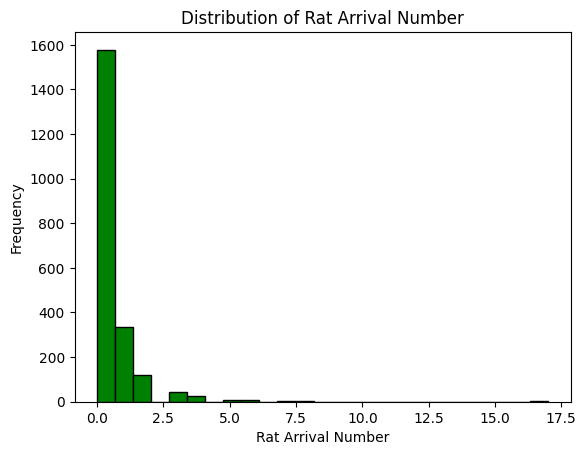

In [99]:
plt.hist(df2["rat_arrival_number"], bins=25, color='green', edgecolor='black')
plt.xlabel("Rat Arrival Number")
plt.ylabel("Frequency")
plt.title("Distribution of Rat Arrival Number")
plt.show()

In [100]:
sample = df2['rat_arrival_number'].values
x_bar = stats.mean(sample)
print("Mean:", x_bar)

median = stats.median(sample)
print("Median: %.2f" % median)

mode = stats.mode(sample)
print("Mode value: %d" % mode)

the_range = np.max(sample) - np.min(sample)
print("Range: %d" % the_range)

sample_array = np.array(sample)
s_square = sample_array.var(ddof=1)
sigma_square = sample_array.var()
print("Sample variance: %.2f. Population variance: %.2f." % (s_square, sigma_square))

s = sample_array.std(ddof=1)
sigma = sample_array.std()
print("Sample std. dev.: %.2f. Population std. dev.: %.2f." % (s, sigma))

pct25 = np.percentile(sample, 25)
pct75 = np.percentile(sample, 75)
iqr = pct75 - pct25
print("IQR: %.2f. 25th percentile: %.2f. 75th percentile: %.2f" % (iqr, pct25, pct75))


Mean: 0
Median: 0.00
Mode value: 0
Range: 17
Sample variance: 1.04. Population variance: 1.04.
Sample std. dev.: 1.02. Population std. dev.: 1.02.
IQR: 1.00. 25th percentile: 0.00. 75th percentile: 1.00


##  Key columns in dataset2

For investigating whether bats perceive rats as predators, we focus on:
- **Bat landing Number** 
- **Rat arrival number**
- *Food avialability* 
- *Rat Minutes*

In [101]:

with_rats = df2[df2['rat_arrival_number'] > 0]
without_rats = df2[df2['rat_arrival_number'] == 0]

print(f"Observation periods with rats: {len(with_rats)}")
print(f"Observation periods without rats: {len(without_rats)}")

# Compare bat landing numbers
print(f"\nBat activity comparison:")
print(f"Average bat landings with rats present: {stats.mean(with_rats['bat_landing_number']):.2f}")
print(f"Average bat landings without rats: {stats.mean(without_rats['bat_landing_number']):.2f}")

print(f"\nMedian bat landings with rats present: {np.median(with_rats['bat_landing_number']):.2f}")
print(f"Median bat landings without rats: {np.median(without_rats['bat_landing_number']):.2f}")

# Standard deviation
print(f"\nStandard deviation with rats: {np.std(with_rats['bat_landing_number'], ddof=1):.2f}")
print(f"Standard deviation without rats: {np.std(without_rats['bat_landing_number'], ddof=1):.2f}")

Observation periods with rats: 545
Observation periods without rats: 1578

Bat activity comparison:
Average bat landings with rats present: 27.67
Average bat landings without rats: 33.61

Median bat landings with rats present: 21.00
Median bat landings without rats: 29.00

Standard deviation with rats: 22.39
Standard deviation without rats: 26.47


In [102]:

print("\n=== Rat Intensity vs Bat Activity ===")

# Categorize rat presence intensity
df2['rat_intensity'] = pd.cut(df2['rat_arrival_number'], 
                                      bins=[-1, 0, 1, 2, float('inf')], 
                                      labels=['No rats', 'Low (1)', 'Medium (2)', 'High (3+)'])

rat_intensity_analysis = df2.groupby('rat_intensity').agg({
    'bat_landing_number': ['count', 'mean', 'median'],
    'food_availability': 'mean',
    'rat_minutes': 'mean'
}).round(2)

print("Bat activity by rat presence intensity:")
rat_intensity_analysis


=== Rat Intensity vs Bat Activity ===
Bat activity by rat presence intensity:


bat_landing_number               food_availability rat_minutes
                           count   mean median              mean        mean
rat_intensity                                                               
No rats                     1578  33.61   29.0              2.50        0.00
Low (1)                      335  28.66   22.0              2.24        4.88
Medium (2)                   118  26.56   22.0              2.42        7.49
High (3+)                     92  25.49   16.0              2.34       18.65

In [103]:
approach_times = df1['bat_landing_to_food']
min_time = approach_times.min()
q25 = np.percentile(approach_times, 25)
q75 = np.percentile(approach_times, 75)
max_time = approach_times.max()

print(f"Approach time ranges:")
print(f"Minimum: {min_time:.2f} seconds")
print(f"25rd percentile: {q25:.2f} seconds")
print(f"75th percentile: {q75:.2f} seconds")
print(f"Maximum: {max_time:.2f} seconds")


Approach time ranges:
Minimum: 0.01 seconds
25rd percentile: 1.00 seconds
75th percentile: 11.50 seconds
Maximum: 443.00 seconds


In [104]:

time_bins = [0.01, q25, q75, max_time + 1]
vigilance_labels = ['Low_Vigilance', 'Medium_Vigilance', 'High_Vigilance']

df1['vigilance_level'] = pd.cut(df1['bat_landing_to_food'], 
                                             bins=time_bins, 
                                             labels=vigilance_labels)



In [107]:
df1['vigilance_level'].value_counts()

vigilance_level
Medium_Vigilance    417
Low_Vigilance       263
High_Vigilance      227
Name: count, dtype: int64